# Problem Set 2     
## Yunqiu(Julie) Li

In [285]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn

%matplotlib inline
from preamble import *

## Problem 1

###### 1. Write a short Python program to explore some simulated classification data. First generate a vector of length nmc=100 of uniform random numbers. Then use these to generate y values of 0 or 1, where the x value is the probability of y = 1. 

In [286]:
nmc = 100
X = np.random.uniform(size=(nmc,1))
Y = np.zeros(nmc,dtype=int)+( np.random.uniform(size=nmc)<X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.5)

1.1 Write a k nearest neighbor predictor for your data, using k=3. Report the accuracy
both for the training and testing sample.

In [287]:
from sklearn.neighbors import KNeighborsClassifier
# set the number of neighbors to consider to 3
knn= KNeighborsClassifier(n_neighbors=3)

In [288]:
# fit the model using the training data and training targets
knn.fit(X_train, y_train)
# generate prediction score on the training dataset
print("Train set accuracy: {:.4f}".format(knn.score(X_train, y_train)))
# generate prediction score on the test dataset
print("Test set accuracy: {:.4f}".format(knn.score(X_test, y_test)))

Train set accuracy: 0.6400
Test set accuracy: 0.3200


##### 1.2 Now repeat the figure we tried in class which showed forecast accuracy in training and testing sets as k varies. Plot the accuracy for nearest neighbor predictors across the range of 1 to 50. Do this for both the training and testing data as we did in class.

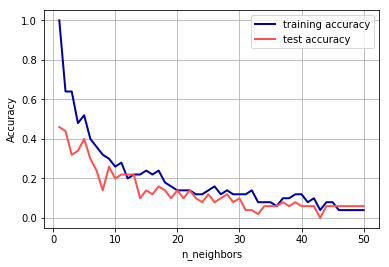

In [289]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 50
neighbors_settings = range(1, 51)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.grid()
plt.legend()

## Problem 2

##### 2.1 First, generate one set of X,y data with sample length 300, with M = 50 forecast variables, and noise=1. Do a short (iterations 100) monte-carlo run with the same set of data, but different random train/test splits (don’t use the random_state parameter since that fixes the random draws). Set the test_size = 0.5 for all problems here. On each split fit a linear regression and record the train and test score (R-squared). Report the mean and standard deviation for both of these across the 100 monte-carlos. (Python note: This involves a for loop across the 100 monte-carlo runs. Each iteration of the loop involves a new train/test split of the original data. Store results in either list, or (better) a numpy array.) 

In [290]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [291]:
# Function to generate linear data experiments 
def genLinData(N,M,noise):
    # y = x_1 + x_2 .. x_M + eps
    # X's scaled so the variance of explained part is same order as noise var 
    sigNoise = np.sqrt(1./M)
    # set up random beta for regression
    beta = np.random.normal(size=(M,1),loc=0.,scale=1.)
    # force smaller betas to zero
    beta[abs(beta)<1.0]=0.
    # bused is the fraction of nonzero beta's
    betaUsed= np.sum( beta != 0)
    X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    eps = np.random.normal(size=(N,1),loc=0,scale=noise)
    # matric multiplecation across all i
    y = X @ beta + eps
    return X,y, betaUsed

In [292]:
nmc = 100
# Generate a set of data
X,y, betaUsed = genLinData(300,50,1)
trainScore = []
testScore  = []
for i in range(nmc):
    # set train/test samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    # initial linear regression model and fit the model using the training data and training targets:
    lr = LinearRegression().fit(X_train, y_train)
    # append accuracy on training data
    trainScore.append(lr.score(X_train,y_train))
    # append accuracy on testing data
    testScore.append(lr.score(X_test,y_test))

# Mean for train and test score
print("Mean for train set score: {:.4f}".format(np.mean(trainScore)))
print("Mean for test set score: {:.4f}".format(np.mean(testScore)))

# Standard deviation for train and test score
print("Standard deviation for train set score: {:.4f}".format(np.std(trainScore)))
print("Standard deviation for test set score: {:.4f}".format(np.std(testScore)))

Mean for train set score: 0.5160
Mean for test set score: -0.1171
Standard deviation for train set score: 0.0453
Standard deviation for test set score: 0.1593


##### 2.2 Run this regression once on a sample size of 100,000. Report train and test scores. Are they close? Why or why not?

In [293]:
# Generate a set of data with 100,000 samples
X,y, betaUsed = genLinData(100000,50,1)
trainScore = []
testScore  = []
for i in range(nmc):
    # set train/test samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    # initial linear regression model and fit the model using the training data and training targets:
    lr = LinearRegression().fit(X_train, y_train)
    # append accuracy on training data
    trainScore.append(lr.score(X_train,y_train))
    # append accuracy on testing data
    testScore.append(lr.score(X_test,y_test))

# Mean for train and test score
print("Mean for train set score: {:.4f}".format(np.mean(trainScore)))
print("Mean for test set score: {:.4f}".format(np.mean(testScore)))

# Standard deviation for train and test score
print("Standard deviation for train set score: {:.4f}".format(np.std(trainScore)))
print("Standard deviation for test set score: {:.4f}".format(np.std(testScore)))

Mean for train set score: 0.3973
Mean for test set score: 0.3965
Standard deviation for train set score: 0.0024
Standard deviation for test set score: 0.0024


If the sample size is increased from 300 to 100,000, the train and test score are very close. Because small data set like 300 can not be very representative in terms of the correlation relationship X and y, as sample size(N) gets larger, it would be representative enough for all the input parameter conditions. 

##### 2.3 Now, run a monte-carlo (iterations 100) where on each run you draw a new data set (X,y) from a sample size of 300 (M=50, noise = 1.0) using the above function. On each run estimate a linear model, and record the training and testing scores, and save them. Report the mean and standard deviation for these scores.


In [294]:
nmc = 100
trainScore = []
testScore  = []
for i in range(nmc):
    # Generate a new set of data
    X,y, betaUsed = genLinData(300,50,1)
    # set train/test samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    # initial linear regression model and fit the model using the training data and training targets:
    lr = LinearRegression().fit(X_train, y_train)
    # append accuracy on training data
    trainScore.append(lr.score(X_train,y_train))
    # append accuracy on testing data
    testScore.append(lr.score(X_test,y_test))

# Mean for train and test score
print("Mean for train set score: {:.4f}".format(np.mean(trainScore)))
print("Mean for test set score: {:.4f}".format(np.mean(testScore)))

# Standard deviation for train and test score
print("Standard deviation for train set score: {:.4f}".format(np.std(trainScore)))
print("Standard deviation for test set score: {:.4f}".format(np.std(testScore)))

Mean for train set score: 0.6275
Mean for test set score: 0.1140
Standard deviation for train set score: 0.0660
Standard deviation for test set score: 0.1696


##### 2.4 Simulate one new data set using the parameters from the last problem. Now set up a Ridge regression. Set up a loop to sweep through alpha from 1 to 25 incremented by 1. Record the score for each ridge regression for each parameter. At the end, plot the R-squared scores for both the training and testing samples across the different values of alpha.

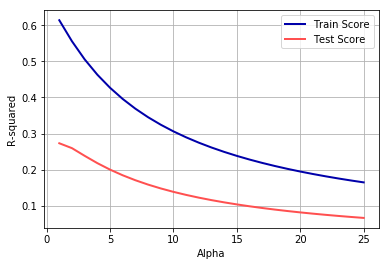

In [295]:
nmc = 100
X,y, nvar = genLinData(300,50,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
trainScore = []
testScore  = []
alpha_range = range(1,26)
for i in alpha_range:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    trainScore.append(ridge.score(X_train,y_train))
    testScore.append(ridge.score(X_test,y_test))
plt.plot(alpha_range, trainScore, label = 'Train Score')
plt.plot(alpha_range, testScore, label = 'Test Score')
plt.xlabel("Alpha")
plt.ylabel("R-squared")
plt.grid()
plt.legend()

##### 2.5   Now repeat this for a Lasso regression. However, this time sweep the alpha parameter from 0.01 through 0.03 incremented by 0.0005. Plot the two scores as you did in the last problem. Also, this time plot the number of non zero coefficients estimated by Lasso as a fraction of the true non zero coefficients from the simulation.

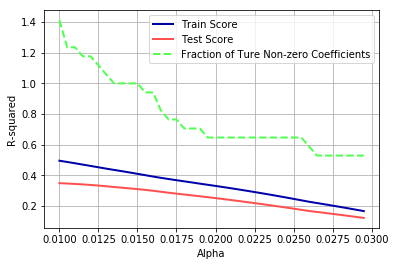

In [297]:
nmc = 100
rsquareVec = np.zeros(nmc)
X,y, nvar = genLinData(300,50,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
trainScore = []
testScore  = []
nonZeroCoefficientFromLasso = []
nonZeroCoefficientFromSim = []
alpha_range = np.arange(0.01,0.03,0.0005)
for i in alpha_range:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    trainScore.append(lasso.score(X_train,y_train))
    testScore.append(lasso.score(X_test,y_test))
    nonZeroCoefficientFromLasso.append(np.sum(lasso.coef_!=0))
    nonZeroCoefficientFromSim.append(betaUsed)
# swith list to numpy array and caculate fraction
fraction = np.asarray(nonZeroCoefficientFromLasso)/np.asarray(nonZeroCoefficientFromSim)
plt.plot(alpha_range, trainScore, label = 'Train Score')
plt.plot(alpha_range, testScore, label = 'Test Score')
plt.plot(alpha_range, fraction, label = 'Fraction of Ture Non-zero Coefficients')
plt.xlabel("Alpha")
plt.ylabel("R-squared")
plt.legend()
plt.grid()